# Giải bài toán tối ưu bằng giải thuật Direct clustering trên ngôn ngữ Python , Jupyter notebook

In [51]:
import pandas as pd
import numpy as np

In [87]:
data = "FP1.xlsx" # or data = "File.csv" đều được
df = pd.read_excel(data) # or pd.read_csv , pd.read_json v.v

In [88]:
df

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7
0,C1,1.0,NaN,NaN,1.0,NaN,1.0,NaN
1,C2,NaN,1.0,1.0,NaN,1.0,NaN,NaN
2,C3,NaN,NaN,NaN,1.0,NaN,1.0,NaN
3,C4,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,C5,NaN,NaN,1.0,NaN,NaN,NaN,1.0
5,C6,NaN,1.0,NaN,NaN,1.0,NaN,1.0


In [89]:
df.set_index(df.columns[0], inplace=True)

In [90]:
df.loc['Sum_columns'] = df.sum(numeric_only=True)
df['Sum_row'] = df.sum(axis=1, numeric_only=True)

In [91]:
df.fillna(0, inplace=True) 

In [92]:
df

,M1,M2,M3,M4,M5,M6,M7,Sum_row
Unnamed: 0,,,,,,,,
C1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
C2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
C3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
C4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
C5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
C6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
Sum_columns,1.0,3.0,3.0,2.0,2.0,2.0,2.0,15.0


## Bước 1 : Tính tổng các cột, hàng và sắp xếp theo giải thuật DCA 

#### Sort data theo của cột Sum_row theo chiều dữ liệu giảm dần


In [93]:
df = df.sort_values(by='Sum_row', ascending=False)

In [94]:
df

,M1,M2,M3,M4,M5,M6,M7,Sum_row
Unnamed: 0,,,,,,,,
Sum_columns,1.0,3.0,3.0,2.0,2.0,2.0,2.0,15.0
C1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
C2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
C6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
C3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
C4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
C5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


#### Sort data của cột Sum_columns theo chiều tăng dần


In [95]:
col_totals = df.loc['Sum_columns']  # Get totals of the columns
sorted_columns = col_totals[:-1].sort_values(ascending=True).index  # sắp xếp các cột trừ cột cuối cùng là Sum_row
df = df.reindex(columns=list(sorted_columns) + ['Sum_row']) # Sắp xếp lại các cột
df

,M1,M4,M5,M6,M7,M2,M3,Sum_row
Unnamed: 0,,,,,,,,
Sum_columns,1.0,2.0,2.0,2.0,2.0,3.0,3.0,15.0
C1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
C2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0
C6,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
C3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
C4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
C5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


# Bước 2 : Xét theo hàng và sắp xếp


In [96]:
row_1 = df.iloc[1][:-1]

In [97]:
cols_with_ones = row_1[row_1 == 1].index
cols_with_zeros = row_1[row_1 == 0].index

In [98]:
df = df.reindex(columns=list(cols_with_ones) + list(cols_with_zeros) + ['Sum_row'])

In [99]:
df

,M1,M4,M6,M5,M7,M2,M3,Sum_row
Unnamed: 0,,,,,,,,
Sum_columns,1.0,2.0,2.0,2.0,2.0,3.0,3.0,15.0
C1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
C2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0
C6,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0
C3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
C4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
C5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


# Bước 3 : Sắp xếp data dựa trên giá trị cột 


In [100]:
df = df.sort_values(by=df.columns[0], ascending=False)
df = df.sort_values(by=df.columns[1], ascending=False)

In [101]:
df = df.drop(index='Sum_columns') 
df = df.drop(columns='Sum_row') 

In [102]:
df

,M1,M4,M6,M5,M7,M2,M3
Unnamed: 0,,,,,,,
C1,1.0,1.0,1.0,0.0,0.0,0.0,0.0
C3,0.0,1.0,1.0,0.0,0.0,0.0,0.0
C2,0.0,0.0,0.0,1.0,0.0,1.0,1.0
C6,0.0,0.0,0.0,1.0,1.0,1.0,0.0
C4,0.0,0.0,0.0,0.0,0.0,1.0,1.0
C5,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Bước 4 : Vẽ plot bằng thư viện seaborn và maplotlib

In [103]:
import seaborn as sns
import matplotlib.pyplot as mpl

Text(0.5, 1.0, 'Machine-matrix')

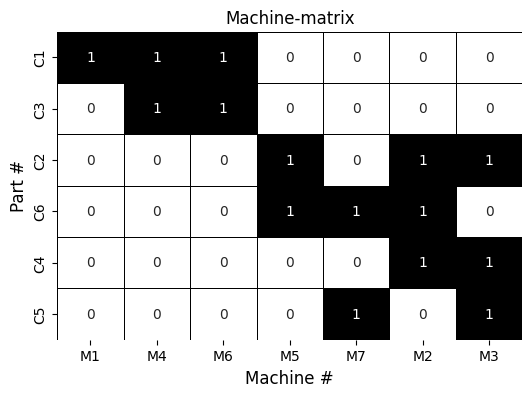

In [104]:
plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap="Greys", cbar=False, linewidths=0.5, linecolor='black')
plt.title("Machine-Part Matrix", pad=20)  
plt.xlabel("Machine #", fontsize=12)     
plt.ylabel("Part #", fontsize=12)         
plt.title("Machine-matrix")

Nhóm 5 - L01- TKMB TN: " Hoàng Đức Quân - 2212786,
                Nguyễn Trường Khánh -2211529,
                Trần Văn Thắng - 2213211,
                Lưu Thanh Bảo - 2210221,
                Nguyễn Hồng Phát - 2212519,
                Võ Thành Tài - 2213006"